In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.csv', header=None)

# Load dataset with headers added manually
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Clean column names (remove leading/trailing spaces)
df.columns = [col.strip() for col in df.columns]

# Preview the dataset
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

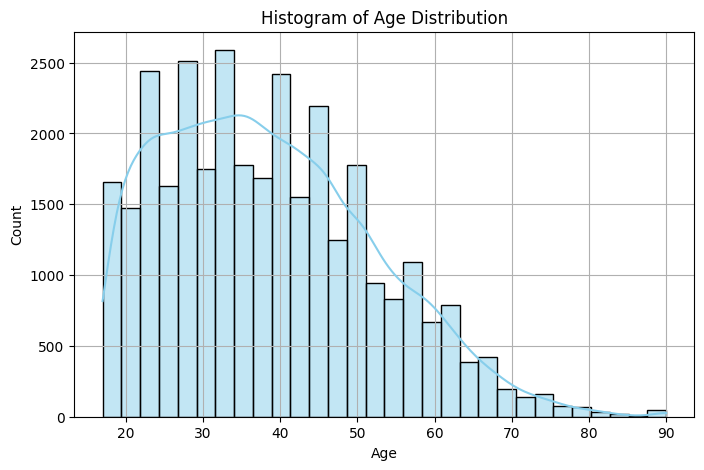

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

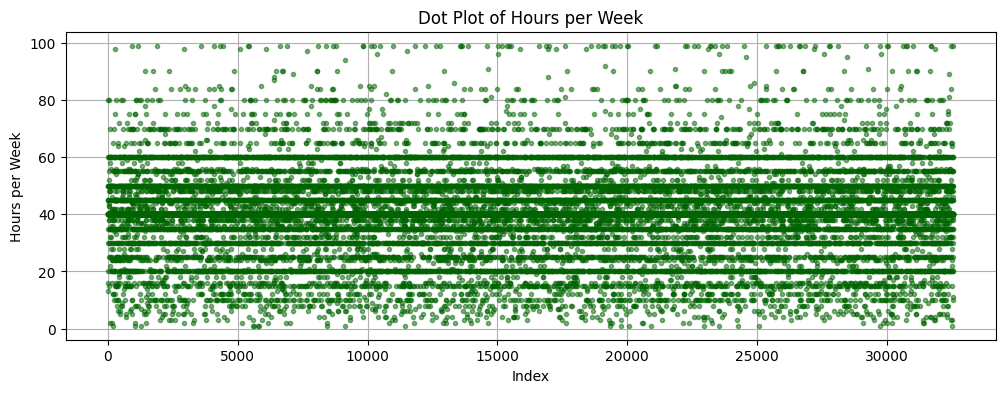

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(df['hours-per-week'], 'o', markersize=3, alpha=0.5, color='darkgreen')
plt.title('Dot Plot of Hours per Week')
plt.xlabel('Index')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_4352\2068980416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')


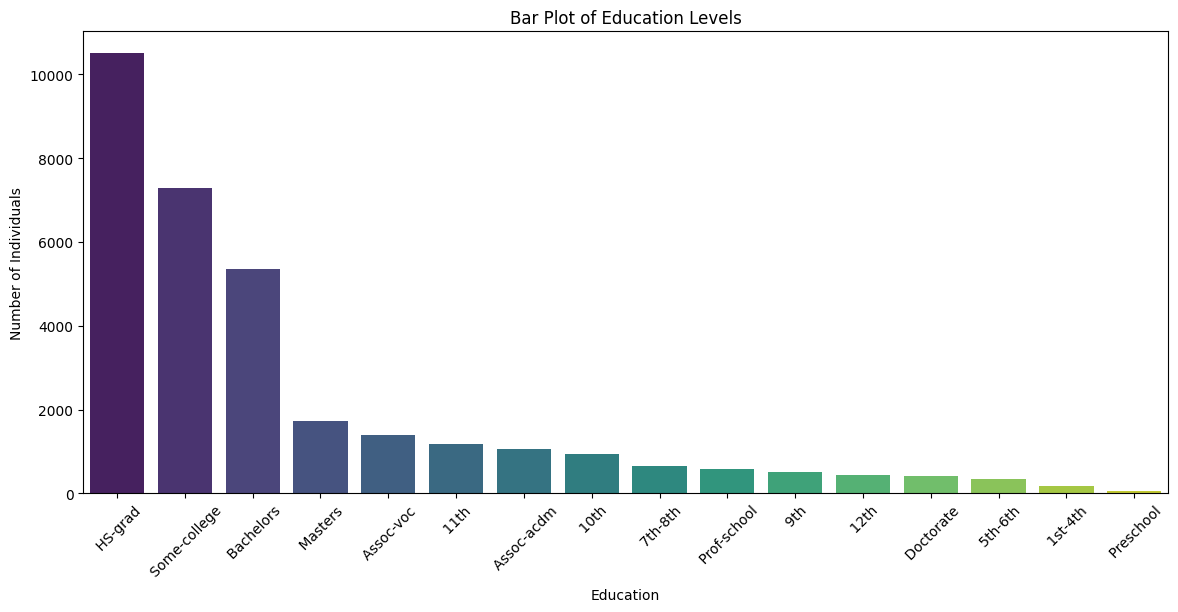

In [7]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Bar Plot of Education Levels')
plt.xlabel('Education')
plt.ylabel('Number of Individuals')
plt.show()


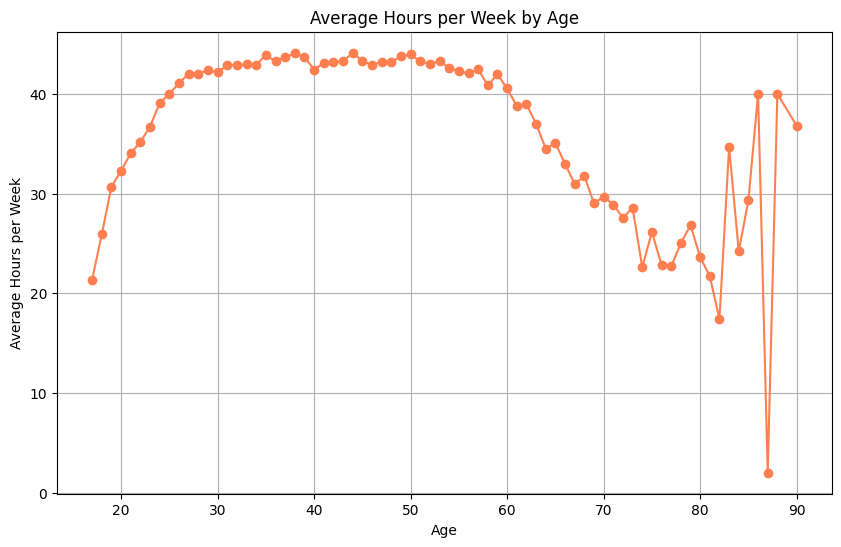

In [8]:
avg_hours = df.groupby('age')['hours-per-week'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_hours.index, avg_hours.values, marker='o', linestyle='-', color='coral')
plt.title('Average Hours per Week by Age')
plt.xlabel('Age')
plt.ylabel('Average Hours per Week')
plt.grid(True)
plt.show()


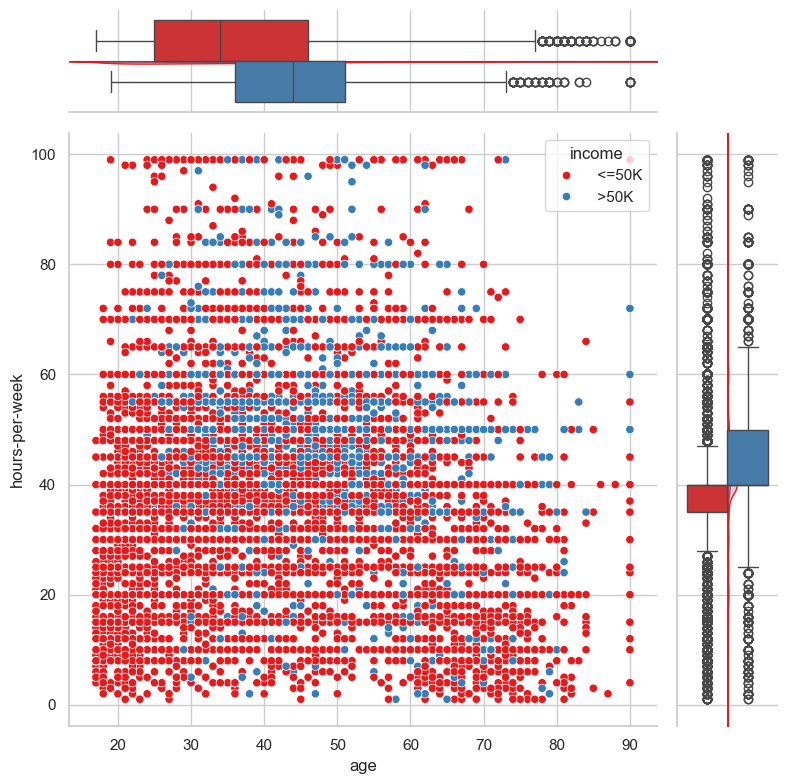

In [11]:
# Joint Plot with scatter and marginal histograms
g = sns.jointplot(
    data=df, 
    x='age', 
    y='hours-per-week', 
    kind='scatter', 
    hue='income', 
    palette='Set1', 
    height=8, 
    marginal_kws=dict(fill=True)  # remove 'bins' if using boxplot later
)

# Add marginal boxplots manually (do NOT use 'bins' here)
g.plot_marginals(sns.boxplot, color='lightgray')

plt.show()
